<h1>ARIMA Model</h1>
<h3>For Stock: TRENT</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima


In [2]:
df_all = pd.read_csv("cleaned_feature_engineered_dataset.csv")
df = df_all[df_all["Stock"] == "TRENT.NS"]

In [3]:
df.head()

,Date,Stock,Open,High,Low,Close,Volume,SMA_50,Close_Lag_1,Close_Lag_3,Close_Lag_7,SMA_7,SMA_30,Daily_Pct_Change
2,2024-03-01,TRENT.NS,3898.575195,3926.256155,3855.704706,3921.309597,645099,6135.819924,3921.309597,3921.309597,3921.309597,5905.422104,6037.768073,0.583146
7,2024-03-04,TRENT.NS,3917.112549,3934.050879,3839.865499,3906.919591,291319,6135.819924,3921.309597,3921.309597,3921.309597,5905.422104,6037.768073,-0.260216
12,2024-03-05,TRENT.NS,3849.658691,3933.151454,3842.413662,3926.805710,549270,6135.819924,3906.919591,3921.309597,3921.309597,5905.422104,6037.768073,2.003996
17,2024-03-06,TRENT.NS,3869.345215,3891.180331,3747.678691,3873.792115,1009678,6135.819924,3926.805710,3921.309597,3921.309597,5905.422104,6037.768073,0.114926
22,2024-03-07,TRENT.NS,3949.490234,3975.272594,3837.667053,3887.332929,680535,6135.819924,3873.792115,3906.919591,3921.309597,5905.422104,6037.768073,-1.573806


In [4]:
df = df.copy()

# Convert the 'Date' column to datetime format
df.loc[:, "Date"] = pd.to_datetime(df["Date"])

# Set 'Date' as the index
df.set_index("Date", inplace=True)

# Sort the data by date to avoid issues
df.sort_index(inplace=True)

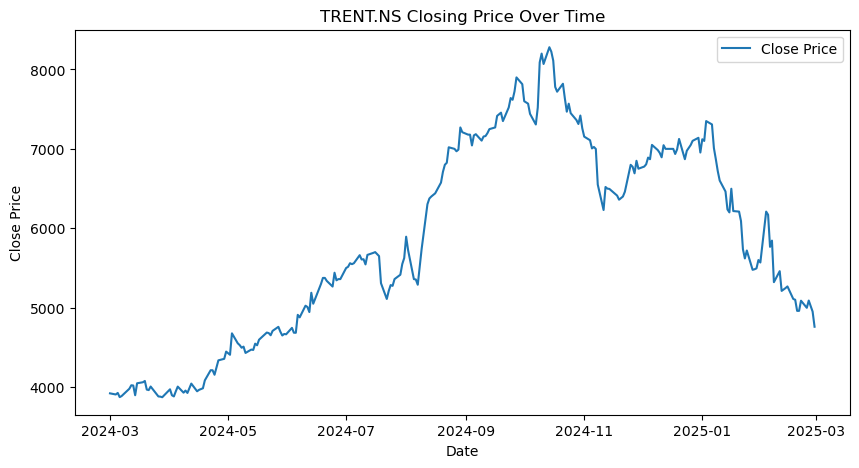

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df["Close"], label="Close Price")
plt.title("TRENT.NS Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [19]:
def adf_test(series):
    result = adfuller(series.dropna()) 
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The series is stationary")
    else:
        print("The series is NOT stationary")
        
print("ADF Test for Close Prices:")
adf_test(df["Close"])


ADF Test for Close Prices:
ADF Statistic: -1.383568128604102
p-value: 0.5901279221048354
The series is NOT stationary


In [20]:
df["Close_diff"] = df["Close"].diff()  S
df.dropna(inplace=True)  

print("\nADF Test After Differencing:")
adf_test(df["Close_diff"])



ADF Test After Differencing:
ADF Statistic: -14.667721905578192
p-value: 3.3040407655226144e-27
The series is stationary


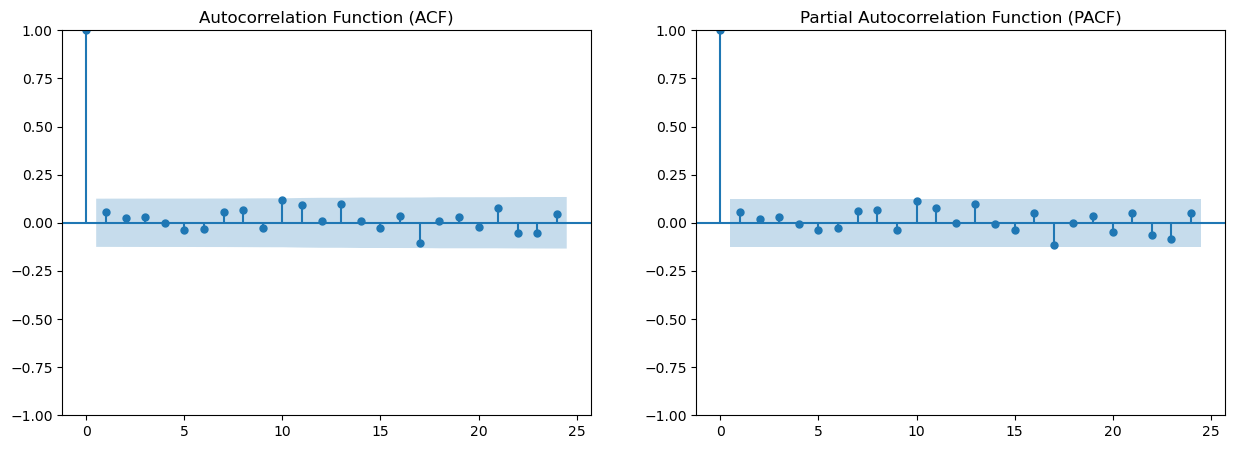

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(df["Close_diff"].dropna(), ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(df["Close_diff"].dropna(), ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")
plt.show()

In [8]:
# Find optimal p, d, q using Auto ARIMA
auto_model = auto_arima(df["Close"], seasonal=False, trace=True, suppress_warnings=True)
print("\nOptimal ARIMA Order:", auto_model.order)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3276.908, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3214.462, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3274.914, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=3188.557, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=3177.957, Time=0.19 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=3174.283, Time=0.21 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=3171.264, Time=0.46 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=3169.284, Time=0.33 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=3172.302, Time=0.11 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=3133.088, Time=0.76 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=3132.092, T

In [9]:
# Extract the best p, d, q values
p, d, q = auto_model.order

# Fit ARIMA model with the best order
model = sm.tsa.ARIMA(df["Close"], order=(p, d, q))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  246
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1560.242
Date:                Sat, 08 Mar 2025   AIC                           3124.483
Time:                        15:15:07   BIC                           3131.478
Sample:                             0   HQIC                          3127.300
                                - 246                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9734      0.016    -62.211      0.000      -1.004      -0.943
sigma2      2.068e+04   1277.650     16.184      0.000    1.82e+04    2.32e+04
Ljung-Box (L1) (Q):                   0.13   Jarque-

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [10]:
# Forecast the next 10 days
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Create date range for predictions
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq="D")[1:]

# Convert forecast to a DataFrame
forecast_df = pd.DataFrame({"Date": future_dates, "Forecasted_Close": forecast.values})
forecast_df.set_index("Date", inplace=True)

# Print forecasted prices
print("\nForecasted Prices:")
print(forecast_df)



Forecasted Prices:
            Forecasted_Close
Date                        
2025-03-01       4725.304378
2025-03-02       4690.608755
2025-03-03       4655.913133
2025-03-04       4621.217511
2025-03-05       4586.521888
2025-03-06       4551.826266
2025-03-07       4517.130644
2025-03-08       4482.435021
2025-03-09       4447.739399
2025-03-10       4413.043776


C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [16]:
# Generate predictions for the full dataset
df["Predicted"] = model_fit.fittedvalues  # Stores in DataFrame


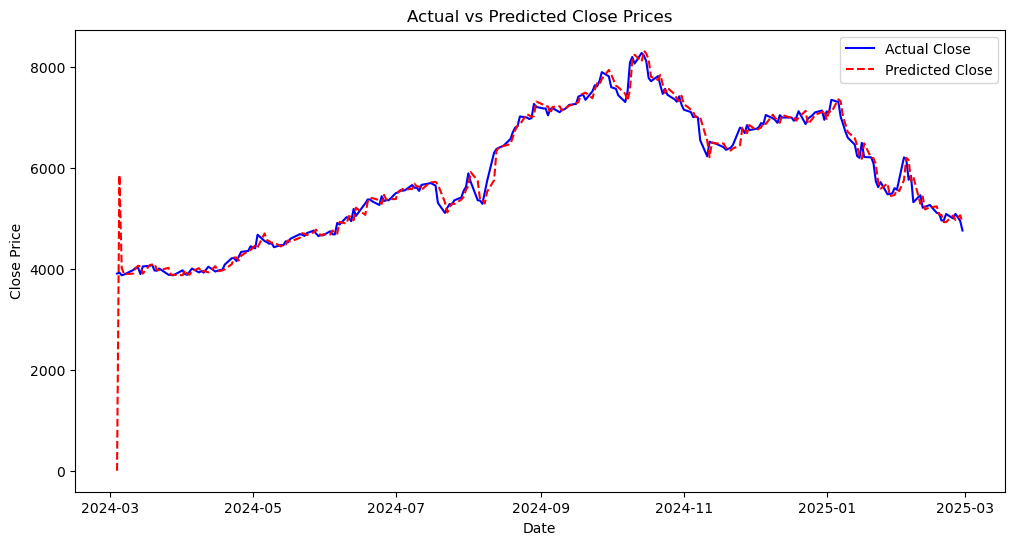

In [17]:
# Plot Actual vs Predicted Close Prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Actual Close", color="blue")
plt.plot(df.index, df["Predicted"], label="Predicted Close", linestyle="dashed", color="red")
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


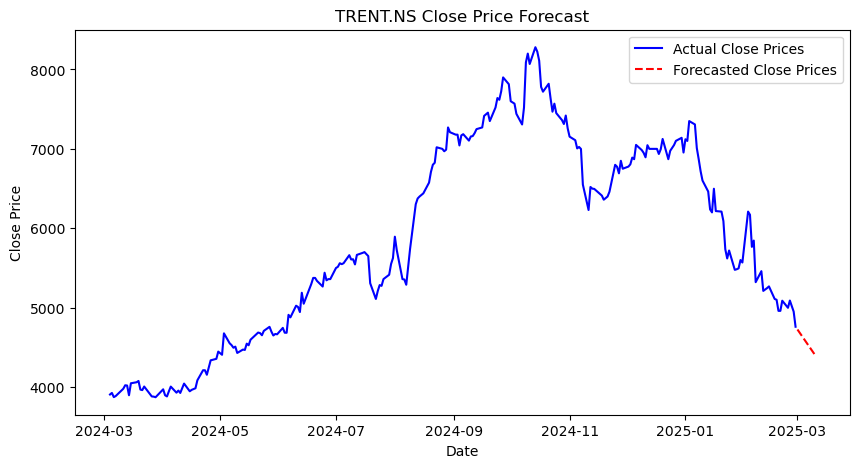

In [11]:
plt.figure(figsize=(10, 5))

# Plot actual close prices
plt.plot(df["Close"], label="Actual Close Prices", color="blue")

# Plot forecasted values
plt.plot(forecast_df, label="Forecasted Close Prices", linestyle="dashed", color="red")

plt.title("TRENT.NS Close Price Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [12]:
import yfinance as yf

In [13]:
data = yf.download('TRENT.NS', start="2025-03-01", end="2025-03-07")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


<h3>Actual prices of stock</h3>

In [14]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,TRENT.NS,TRENT.NS,TRENT.NS,TRENT.NS,TRENT.NS
Date,,,,,
2025-03-03,4946.899902,5022.950195,4775.000000,4900.049805,1415550
2025-03-04,4999.799805,5069.899902,4865.700195,4898.899902,898723
2025-03-05,5106.100098,5320.000000,4987.000000,4987.000000,2128488
2025-03-06,5069.500000,5174.500000,4970.950195,5174.500000,1499675


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

actual = np.array([4946.899902,4999.799805,5106.100098,5069.500000])
predicted = np.array([4655.913133,4621.217511,4586.521888,4551.826266])

rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mape = np.mean(np.abs((actual - predicted) / actual)) * 100  # MAPE formula

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 437.59
MAE: 426.71
MAPE: 8.46%


In [ ]:
df = df.dropna()
